#SQL

C. Restore Database

In [1]:
import pandas as pd
import sqlite3

In [2]:
connection1 = sqlite3.connect("Files/chinook.db")


C. Melihat isi tabel data chinook.db

In [3]:
#menunjukan tabel yang ada dalam database chinook.db
cursor = connection1.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


C. MELIHAT TABEL DATA: EMPLOYEES

In [4]:
#menunjukan isi tabel: misalnya employees
pd.read_sql_query("SELECT * FROM employees limit 4",connection1)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com


D. SYNTAX SQL

In [5]:
#melihat table track
pd.read_sql_query("SELECT * FROM tracks limit 5",connection1)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [6]:
#melihat jumlah masing-masing genre pada data tracks
pd.read_sql_query("SELECT GenreId, count(GenreId)as Count_GenreId FROM tracks GROUP BY GenreId",connection1)

,GenreId,Count_GenreId
0,1,1297
1,2,130
2,3,374
3,4,332
4,5,12
5,6,81
6,7,579
7,8,58
8,9,48
9,10,43


In [7]:
#melihat table genre
pd.read_sql_query("SELECT * FROM genres",connection1)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [8]:
#menggabungkan data tracks dan genre yang memiliki kesamaan pada kolom GenreId
#melihat 5 genre paling banyak jumlah lagu
pd.read_sql_query("SELECT * FROM (SELECT GenreId, count(GenreId)as Count_GenreId FROM tracks GROUP BY GenreId) left outer join (SELECT * FROM genres) using(GenreId) ORDER BY Count_GenreId DESC limit 5",connection1)

,GenreId,Count_GenreId,Name
0,1,1297,Rock
1,7,579,Latin
2,3,374,Metal
3,4,332,Alternative & Punk
4,2,130,Jazz


In [9]:
#jadi, dapat dilihat untuk 5 genre paling banyak jumlah lagunya yang pertama adalah Rock, Latin,Metal,Alternative & punk, Jazz

> II. 3 Jenis media yang paling banyak dipakai

In [10]:
#melihat table track
pd.read_sql_query("SELECT * FROM tracks limit 5",connection1)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [11]:
#menghitung banyak jenis MediaTypeId 
pd.read_sql_query("SELECT MediaTypeId,count(MediaTypeId)as Count_MediaTypeId FROM tracks GROUP BY MediaTypeId",connection1)

,MediaTypeId,Count_MediaTypeId
0,1,3034
1,2,237
2,3,214
3,4,7
4,5,11


In [12]:
#melihat table media_types
pd.read_sql_query("SELECT * FROM media_types",connection1)

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [13]:
#menggabungkan data count_mediatypeid dengan media_types
pd.read_sql_query("SELECT * FROM (SELECT MediaTypeId,count(MediaTypeId)as Count_MediaTypeId FROM tracks GROUP BY MediaTypeId) left outer join (SELECT * FROM media_types) using (MediaTypeId) ORDER BY Count_MediaTypeId DESC limit 3",connection1)

,MediaTypeId,Count_MediaTypeId,Name
0,1,3034,MPEG audio file
1,2,237,Protected AAC audio file
2,3,214,Protected MPEG-4 video file


In [ ]:
#jadi 3 jenis media yang paling banyak dipakai adalah MPEG, AAC, MPEG-4

> IIII. 5 Lagu yang durasinya paling lama

In [14]:
#melihat table tracks
pd.read_sql_query("SELECT * FROM tracks",connection1)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [15]:
#5 lagu yang durasi paling lama
pd.read_sql_query("SELECT Name,Milliseconds FROM tracks ORDER BY Milliseconds DESC limit 5",connection1)

,Name,Milliseconds
0,Occupation / Precipice,5286953
1,Through a Looking Glass,5088838
2,"Greetings from Earth, Pt. 1",2960293
3,The Man With Nine Lives,2956998
4,"Battlestar Galactica, Pt. 2",2956081


> IV. Durasi Genre lagu

In [16]:
#melihat data tracks
pd.read_sql_query("SELECT * FROM tracks limit 5",connection1)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [17]:
#Mencari timestamp dari kolom Milliseconds
pd.read_sql_query("SELECT GenreId,Milliseconds,time(Milliseconds,'unixepoch')as durasi FROM tracks",connection1)

,GenreId,Milliseconds,durasi
0,1,343719,23:28:39
1,1,342562,23:09:22
2,1,230619,16:03:39
3,1,252051,22:00:51
4,1,375418,08:16:58
...,...,...,...
3498,24,286741,07:39:01
3499,24,139200,14:40:00
3500,24,66639,18:30:39
3501,24,221331,13:28:51


In [18]:
#Rata-rata durasi lagu setiap genre
pd.read_sql_query("SELECT GenreId,durasi,AVG(durasi) as new_durasi FROM (SELECT GenreId,Milliseconds,time(Milliseconds,'unixepoch')as durasi FROM tracks) GROUP BY GenreId",connection1)

,GenreId,durasi,new_durasi
0,1,07:32:03,11.942945
1,2,02:08:56,10.030769
2,3,04:02:17,11.590909
3,4,19:30:56,10.990964
4,5,05:56:47,12.750000
5,6,21:38:04,12.098765
6,7,23:58:30,11.521589
7,8,17:30:07,11.896552
8,9,16:17:06,10.645833
9,10,09:13:25,8.720930


In [19]:
#Rata-rata durasi lagu setiap genre setelah di bulatkan
pd.read_sql_query("SELECT GenreId,durasi,ROUND(new_durasi)as new_durasi FROM(SELECT GenreId,durasi,AVG(durasi) as new_durasi FROM (SELECT GenreId,Milliseconds,time(Milliseconds,'unixepoch')as durasi FROM tracks) GROUP BY GenreId)",connection1)

,GenreId,durasi,new_durasi
0,1,07:32:03,12.0
1,2,02:08:56,10.0
2,3,04:02:17,12.0
3,4,19:30:56,11.0
4,5,05:56:47,13.0
5,6,21:38:04,12.0
6,7,23:58:30,12.0
7,8,17:30:07,12.0
8,9,16:17:06,11.0
9,10,09:13:25,9.0


In [20]:
#Rata-rata durasi tiap genre
pd.read_sql_query("SELECT * FROM(SELECT GenreId,durasi,ROUND(new_durasi)as new_durasi FROM(SELECT GenreId,durasi,AVG(durasi) as new_durasi FROM (SELECT GenreId,Milliseconds,time(Milliseconds,'unixepoch')as durasi FROM tracks) GROUP BY GenreId))left outer join (SELECT * FROM genres) using(GenreId)",connection1)

,GenreId,durasi,new_durasi,Name
0,1,07:32:03,12.0,Rock
1,2,02:08:56,10.0,Jazz
2,3,04:02:17,12.0,Metal
3,4,19:30:56,11.0,Alternative & Punk
4,5,05:56:47,13.0,Rock And Roll
5,6,21:38:04,12.0,Blues
6,7,23:58:30,12.0,Latin
7,8,17:30:07,12.0,Reggae
8,9,16:17:06,11.0,Pop
9,10,09:13:25,9.0,Soundtrack


In [21]:
#Genre yang durasinya paling lama
pd.read_sql_query("SELECT GenreId,Name,max(durasi)as Durasi_Lama FROM(SELECT * FROM(SELECT GenreId,durasi,ROUND(new_durasi)as new_durasi FROM(SELECT GenreId,durasi,AVG(durasi) as new_durasi FROM (SELECT GenreId,Milliseconds,time(Milliseconds,'unixepoch')as durasi FROM tracks) GROUP BY GenreId))left outer join (SELECT * FROM genres) using(GenreId))",connection1)

,GenreId,Name,Durasi_Lama
0,7,Latin,23:58:30


In [22]:
#genre yang durasinya paling sedikit
pd.read_sql_query("SELECT GenreId,Name,min(durasi)as Durasi_Sedikit FROM(SELECT * FROM(SELECT GenreId,durasi,ROUND(new_durasi)as new_durasi FROM(SELECT GenreId,durasi,AVG(durasi) as new_durasi FROM (SELECT GenreId,Milliseconds,time(Milliseconds,'unixepoch')as durasi FROM tracks) GROUP BY GenreId))left outer join (SELECT * FROM genres) using(GenreId))",connection1)

,GenreId,Name,Durasi_Sedikit
0,25,Opera,00:33:33


> V. Customer yang membeli lagu


In [23]:
#melihat table invoices
pd.read_sql_query("SELECT * FROM invoices limit 20",connection1)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
8,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
9,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94


In [24]:
#memisahkan antar Date dan Time
pd.read_sql_query("SELECT CustomerId,DATE(InvoiceDate)as Date,Total FROM invoices",connection1)

,CustomerId,Date,Total
0,2,2009-01-01,1.98
1,4,2009-01-02,3.96
2,8,2009-01-03,5.94
3,14,2009-01-06,8.91
4,23,2009-01-11,13.86
...,...,...,...
407,25,2013-12-05,3.96
408,29,2013-12-06,5.94
409,35,2013-12-09,8.91
410,44,2013-12-14,13.86


In [25]:
#Customers yang paling banyak membeli lagu di bulan
pd.read_sql_query("SELECT CustomerId,Date,max(Total)as Pembelian FROM (SELECT CustomerId,DATE(InvoiceDate)as Date,Total FROM invoices) ORDER BY Total",connection1)

,CustomerId,Date,Pembelian
0,6,2013-11-13,25.86


E. Screenshot syntax dan output

In [ ]:
#ada di folder screenshoot syntax dan output

#Python

In [26]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import iqr

In [31]:
df = pd.read_sql_query("SELECT * FROM invoices",connection1)
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          412 non-null    int64  
 1   CustomerId         412 non-null    int64  
 2   InvoiceDate        412 non-null    object 
 3   BillingAddress     412 non-null    object 
 4   BillingCity        412 non-null    object 
 5   BillingState       210 non-null    object 
 6   BillingCountry     412 non-null    object 
 7   BillingPostalCode  384 non-null    object 
 8   Total              412 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


B. Mean,Median,Q1,Q3,Min, dan Max untuk kolom total per tahun

In [32]:
#drop kolom
colsTodrop = ['BillingAddress','BillingCity','BillingState','BillingCountry','BillingPostalCode']
df.drop(colsTodrop, axis=1, inplace=True)
df

,InvoiceId,CustomerId,InvoiceDate,Total
0,1,2,2009-01-01 00:00:00,1.98
1,2,4,2009-01-02 00:00:00,3.96
2,3,8,2009-01-03 00:00:00,5.94
3,4,14,2009-01-06 00:00:00,8.91
4,5,23,2009-01-11 00:00:00,13.86
...,...,...,...,...
407,408,25,2013-12-05 00:00:00,3.96
408,409,29,2013-12-06 00:00:00,5.94
409,410,35,2013-12-09 00:00:00,8.91
410,411,44,2013-12-14 00:00:00,13.86


In [33]:
df.columns

Index(['InvoiceId', 'CustomerId', 'InvoiceDate', 'Total'], dtype='object')

In [34]:
df.dtypes

InvoiceId        int64
CustomerId       int64
InvoiceDate     object
Total          float64
dtype: object

In [35]:
#mengeluarkan data Date dari InvoiceDate
df['new_date'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['new_time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [36]:
df

,InvoiceId,CustomerId,InvoiceDate,Total,new_date,new_time
0,1,2,2009-01-01 00:00:00,1.98,2009-01-01,00:00:00
1,2,4,2009-01-02 00:00:00,3.96,2009-01-02,00:00:00
2,3,8,2009-01-03 00:00:00,5.94,2009-01-03,00:00:00
3,4,14,2009-01-06 00:00:00,8.91,2009-01-06,00:00:00
4,5,23,2009-01-11 00:00:00,13.86,2009-01-11,00:00:00
...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,3.96,2013-12-05,00:00:00
408,409,29,2013-12-06 00:00:00,5.94,2013-12-06,00:00:00
409,410,35,2013-12-09 00:00:00,8.91,2013-12-09,00:00:00
410,411,44,2013-12-14 00:00:00,13.86,2013-12-14,00:00:00


In [37]:
df.dtypes

InvoiceId        int64
CustomerId       int64
InvoiceDate     object
Total          float64
new_date        object
new_time        object
dtype: object

In [38]:
#melihat missing value
for col in ['CustomerId','Total','new_date']:
    print(df[col].unique())

[ 2  4  8 14 23 37 38 40 42 46 52 16 17 19 21 25 31 54 55 57 59 10 33 34
 36 48 12 13 15 27 50 51 53  6 29 30 32 44  9 11 47 49 26 28  5  7 43 45
 22 24  1  3 39 41 18 20 56 58 35]
[ 1.98  3.96  5.94  8.91 13.86  0.99  6.94 17.91 18.86 21.86  1.99  3.98
  9.91 15.86 14.91  2.98  7.96  8.94 10.91 23.86 16.86 11.94 25.86]
[datetime.date(2009, 1, 1) datetime.date(2009, 1, 2)
 datetime.date(2009, 1, 3) datetime.date(2009, 1, 6)
 datetime.date(2009, 1, 11) datetime.date(2009, 1, 19)
 datetime.date(2009, 2, 1) datetime.date(2009, 2, 2)
 datetime.date(2009, 2, 3) datetime.date(2009, 2, 6)
 datetime.date(2009, 2, 11) datetime.date(2009, 2, 19)
 datetime.date(2009, 3, 4) datetime.date(2009, 3, 5)
 datetime.date(2009, 3, 6) datetime.date(2009, 3, 9)
 datetime.date(2009, 3, 14) datetime.date(2009, 3, 22)
 datetime.date(2009, 4, 4) datetime.date(2009, 4, 5)
 datetime.date(2009, 4, 6) datetime.date(2009, 4, 9)
 datetime.date(2009, 4, 14) datetime.date(2009, 4, 22)
 datetime.date(2009, 5, 5) datetim

In [ ]:
#data customerid, Total, dan new_date tidak memiliki missing value, jadi bisa langsung di eksekusi

In [39]:
#memisahkan tahun untuk menghitung mean,median Q1,Q3,min,max pertahun
df['year'] = pd.to_datetime(df['new_date']).dt.year
df

,InvoiceId,CustomerId,InvoiceDate,Total,new_date,new_time,year
0,1,2,2009-01-01 00:00:00,1.98,2009-01-01,00:00:00,2009
1,2,4,2009-01-02 00:00:00,3.96,2009-01-02,00:00:00,2009
2,3,8,2009-01-03 00:00:00,5.94,2009-01-03,00:00:00,2009
3,4,14,2009-01-06 00:00:00,8.91,2009-01-06,00:00:00,2009
4,5,23,2009-01-11 00:00:00,13.86,2009-01-11,00:00:00,2009
...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,3.96,2013-12-05,00:00:00,2013
408,409,29,2013-12-06 00:00:00,5.94,2013-12-06,00:00:00,2013
409,410,35,2013-12-09 00:00:00,8.91,2013-12-09,00:00:00,2013
410,411,44,2013-12-14 00:00:00,13.86,2013-12-14,00:00:00,2013




> B. Nilai:



In [40]:
print("Nilai rata-rata tahun 2009:",df[df['year'] == 2009]['Total'].mean())
print("Nilai median tahun 2009:",df[df['year'] == 2009]['Total'].median())
print("Nilai minimal tahun 2009:", df[df['year'] == 2009]['Total'].min())
print("Nilai Maksimal tahun 2009:", df[df['year'] == 2009]['Total'].max())
print("Nilai Q1 tahun 2009:", np.percentile(df[df['year']==2009]['Total'],25))
print("Nilai Q3 tahun 2009:", np.percentile(df[df['year']==2009]['Total'],75))

Nilai rata-rata tahun 2009: 5.4151807228915665
Nilai median tahun 2009: 3.96
Nilai minimal tahun 2009: 0.99
Nilai Maksimal tahun 2009: 13.86
Nilai Q1 tahun 2009: 1.98
Nilai Q3 tahun 2009: 8.91


In [41]:
print("Nilai rata-rata tahun 2010:", df[df['year'] == 2010]['Total'].mean())
print("Nilai Median tahun 2010:", df[df['year'] == 2010]['Total'].median())
print("Nilai Minimal tahun 2010:", df[df['year'] == 2010]['Total'].min())
print("Nilai Maksimal tahun 2010:", df[df['year'] == 2010]['Total'].max())
print("Nilai Q1 tahun 2010:", np.percentile(df[df['year']==2010]['Total'],25))
print("Nilai Q3 tahun 2010:", np.percentile(df[df['year']==2010]['Total'],75))

Nilai rata-rata tahun 2010: 5.800602409638554
Nilai Median tahun 2010: 3.96
Nilai Minimal tahun 2010: 0.99
Nilai Maksimal tahun 2010: 21.86
Nilai Q1 tahun 2010: 1.98
Nilai Q3 tahun 2010: 8.91


In [42]:
print("Nilai rata-rata tahun 2011:",df[df['year'] == 2011]['Total'].mean())
print("Nilai median tahun 2011:", df[df['year'] == 2011]['Total'].median())
print("Nilai Minimal tahun 2011:", df[df['year'] == 2011]['Total'].min())
print("Nilai Maksimal tahun 2011:", df[df['year'] == 2011]['Total'].max())
print("Nilai Q1 tahun 2011:", np.percentile(df[df['year']==2011]['Total'],25))
print("Nilai Q3 tahun 2011:", np.percentile(df[df['year']==2011]['Total'],75))

Nilai rata-rata tahun 2011: 5.6575903614457825
Nilai median tahun 2011: 3.96
Nilai Minimal tahun 2011: 0.99
Nilai Maksimal tahun 2011: 21.86
Nilai Q1 tahun 2011: 1.98
Nilai Q3 tahun 2011: 8.91


In [43]:
print("Nilai rata-rata tahun 2012:", df[df['year'] == 2012]['Total'].mean())
print("Nilai median tahun 2012:", df[df['year'] == 2012]['Total'].median())
print("Nilai Minimal tahun 2012:",df[df['year'] == 2012]['Total'].min())
print("Nilai Maksimal tahun 2012:", df[df['year'] == 2012]['Total'].max())
print("Nilai Q1 tahun 2012:", np.percentile(df[df['year']==2012]['Total'],25))
print("Nilai Q3 tahun 2012:", np.percentile(df[df['year']==2012]['Total'],75))

Nilai rata-rata tahun 2012: 5.753373493975904
Nilai median tahun 2012: 3.96
Nilai Minimal tahun 2012: 0.99
Nilai Maksimal tahun 2012: 23.86
Nilai Q1 tahun 2012: 1.98
Nilai Q3 tahun 2012: 8.91


In [44]:
print("Nilai rata-rata tahun 2013:",df[df['year'] == 2013]['Total'].mean())
print("Nilai median tahun 2013:",df[df['year'] == 2013]['Total'].median())
print("Nilai Minimal tahun 2013:", df[df['year'] == 2013]['Total'].min())
print("Nilai Maksimal tahun 2013:", df[df['year'] == 2013]['Total'].max())
print("Nilai Q1 tahun 2013:", np.percentile(df[df['year']==2013]['Total'],25))
print("Nilai Q3 tahun 2013:", np.percentile(df[df['year']==2013]['Total'],75))

Nilai rata-rata tahun 2013: 5.632249999999999
Nilai median tahun 2013: 3.96
Nilai Minimal tahun 2013: 0.99
Nilai Maksimal tahun 2013: 25.86
Nilai Q1 tahun 2013: 1.98
Nilai Q3 tahun 2013: 8.91


C. Boxplot

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


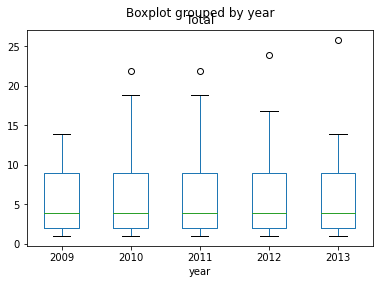

In [45]:
df.boxplot(by = 'year',column=['Total'], grid=False)

In [ ]:
#dari boxplot diatas dapat diketahui pada tahun 2009 dari tabel Total menunjukan tidak adanya nilai outlier, artinya tidak ada nilai ekstrim dan distribusi data simetris atau normal. Sedangkan pada tahun 2010-2013 terdapat outlier/nilai ekstrim sehingga pendistribusian data tidak simetris

D. Perhitungan IQR untuk melihat outlier

In [46]:
#drop kolom
colsTodrop = ['InvoiceDate','new_date','new_time']
df.drop(colsTodrop, axis=1, inplace=True)
df

,InvoiceId,CustomerId,Total,year
0,1,2,1.98,2009
1,2,4,3.96,2009
2,3,8,5.94,2009
3,4,14,8.91,2009
4,5,23,13.86,2009
...,...,...,...,...
407,408,25,3.96,2013
408,409,29,5.94,2013
409,410,35,8.91,2013
410,411,44,13.86,2013


In [47]:
df['Total'].describe()

count    412.000000
mean       5.651942
std        4.745320
min        0.990000
25%        1.980000
50%        3.960000
75%        8.910000
max       25.860000
Name: Total, dtype: float64

In [49]:
Q1 = np.percentile(df['Total'], 25, interpolation= 'midpoint')
print(Q1)
Q3 = np.percentile(df['Total'], 75, interpolation= 'midpoint')
print(Q3)
IQR = Q3 - Q1

1.98
8.91


In [ ]:
#dapat dilihat, nilai Q1 sebesa 1.98 dan Q3 sebesar 8.91, yang artinya memiliki batas bawah dan batas atas. Sehingga dapat dilakukan proses selanjutnya:

In [50]:
#upper bound
upper = np.where(df['Total'] >= (Q3+1.5*IQR))

#lower bound
lower = np.where(df['Total'] <= (Q1-1.5*IQR))

In [51]:
#ketemu nilai outlier dari upper yang dapat dilihat di array
print(upper)
print(lower)

(array([ 95, 193, 298, 403]),)
(array([], dtype=int64),)


In [52]:
df[df['Total'] >= (Q3+1.5*IQR)]

,InvoiceId,CustomerId,Total,year
95,96,45,21.86,2010
193,194,46,21.86,2011
298,299,26,23.86,2012
403,404,6,25.86,2013


In [ ]:
#keterangan:
#invoiceId yang memiliki nilai outlier yaitu 
# InvoiceId 96 dengan nomor customerid 45 yang melakukan transaksi pada tanggal 18-02-2010
# InvoiceId 194 dengan nomor customerid 46 yang melakukan transaksi pada tanggal 28-04-2011
# InvoiceId 299 dengan nomor customerid 26 yang melakukan transaksi pada tanggal 05-08-2012
# InvoiceId 404 dengan nomor customerid 6 yang melakukan transaksi pada tanggal 13-11-2013
# agar lebih yakin akan digunakan histogram untuk melihat bentuk outliernya

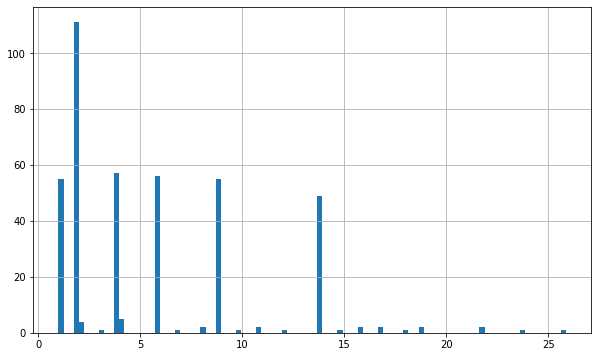

In [53]:
plt.figure(figsize=(10,6))
df['Total'].hist(bins=100)

E. Melihat Missing Value

In [54]:
df = pd.read_sql_query("SELECT * FROM invoices",connection1)
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [55]:
colsTodrop = ['InvoiceId','InvoiceDate','CustomerId','InvoiceDate','BillingAddress','BillingCity','BillingCountry','Total']
df.drop(colsTodrop, axis=1, inplace=True)
df

,BillingState,BillingPostalCode
0,None,70174
1,None,0171
2,None,1000
3,AB,T6G 2C7
4,MA,2113
...,...,...
407,WI,53703
408,ON,M6J 1V1
409,None,None
410,None,00530


In [56]:
#melihat missing value
for col in ['BillingState','BillingPostalCode']:
    print(df[col].unique())

[None 'AB' 'MA' 'Dublin' 'CA' 'WA' 'NV' 'WI' 'NS' 'NSW' 'SP' 'NT' 'VV'
 'RJ' 'DF' 'BC' 'AZ' 'ON' 'MB' 'RM' 'TX' 'UT' 'FL' 'IL' 'QC' 'NY']
['70174' '0171' '1000' 'T6G 2C7' '2113' '60316' '10779' '75002' '33000'
 None 'N1 5LH' '94043-1351' '98052-8300' '95014' '89503' '53703' 'B3S 1C5'
 'EH4 1HH' '2010' '560001' '01007-010' 'X1A 1N6' '10789' '1016'
 '20040-020' '71020-677' 'V6C 1G8' '85719' '28015' '11230' 'SW1V 3EN'
 '14300' 'M6J 1V1' 'K2P 1L7' 'R3L 2B9' '00530' '1720' '01310-200' '00192'
 '00-358' '76110' '84102' '14700' '1010' '21000' 'H-1073' '32801' '60611'
 '12227-000' 'H2G 1A7' '75009' '69002' '10012-2612' '94040-111' '1106'
 '110017']


In [57]:
df.isnull().sum()

BillingState         202
BillingPostalCode     28
dtype: int64

In [ ]:
#jumlah missing value pada BillingState sebesar 202 dan BillingPostalCode sebesar 28

In [58]:
percent_missing = df.isnull().sum()*100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
BillingState,BillingState,49.029126
BillingPostalCode,BillingPostalCode,6.796117


In [59]:
#Missing Value yang ditunjukan dalam satuan % dari tabel diatas adalah BillingState 49% dan BillingPostalCode 6.7%